Centroides SIN escalar:
[[  49.33333333 5548.53333333]
 [  41.13333333 1745.6       ]
 [  41.35       8477.65      ]]

Centroides CON escalar (reconvertidos a unidades reales):
[[  40.7826087  8008.43478261]
 [  62.25       4906.        ]
 [  33.26666667 2393.26666667]]


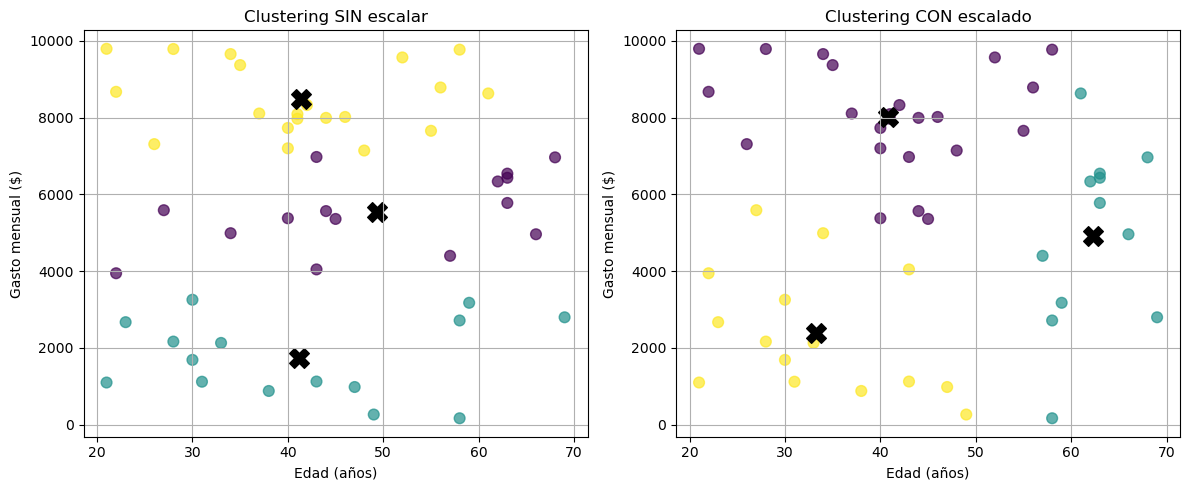

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Generar datos simulados (Edad, Gasto mensual)
np.random.seed(42)
X = np.column_stack([
    np.random.randint(20, 70, 50),         # Edad (20 a 70)
    np.random.randint(100, 10000, 50)      # Gasto mensual ($)
])

# --- K-Means SIN escalar ---
kmeans_no_scale = KMeans(n_clusters=3, random_state=42)
labels_no_scale = kmeans_no_scale.fit_predict(X)
centroids_no_scale = kmeans_no_scale.cluster_centers_

# --- Escalado de datos ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- K-Means CON escalado ---
kmeans_scaled = KMeans(n_clusters=3, random_state=42)
labels_scaled = kmeans_scaled.fit_predict(X_scaled)
centroids_scaled = kmeans_scaled.cluster_centers_

# --- Reconversión de centroides a unidades originales ---
centroids_scaled_original = scaler.inverse_transform(centroids_scaled)

# --- Mostrar centroides ---
print("Centroides SIN escalar:")
print(centroids_no_scale)
print("\nCentroides CON escalar (reconvertidos a unidades reales):")
print(centroids_scaled_original)

# --- Visualización comparativa ---
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Clustering sin escalar
axs[0].scatter(X[:,0], X[:,1], c=labels_no_scale, s=60, alpha=0.7)
axs[0].scatter(centroids_no_scale[:,0], centroids_no_scale[:,1], c='black', marker='X', s=200)
axs[0].set_title("Clustering SIN escalar")
axs[0].set_xlabel("Edad (años)")
axs[0].set_ylabel("Gasto mensual ($)")
axs[0].grid(True)

# Clustering con escalado (centroides reconvertidos)
axs[1].scatter(X[:,0], X[:,1], c=labels_scaled, s=60, alpha=0.7)
axs[1].scatter(centroids_scaled_original[:,0], centroids_scaled_original[:,1], c='black', marker='X', s=200)
axs[1].set_title("Clustering CON escalado")
axs[1].set_xlabel("Edad (años)")
axs[1].set_ylabel("Gasto mensual ($)")
axs[1].grid(True)

plt.tight_layout()
plt.show()
